In [17]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader

from collections import OrderedDict

In [18]:
!nvidia-smi

Thu Mar 30 13:42:38 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.41                 Driver Version: 531.41       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce MX150          WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   47C    P0               N/A /  N/A|      0MiB /  2048MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

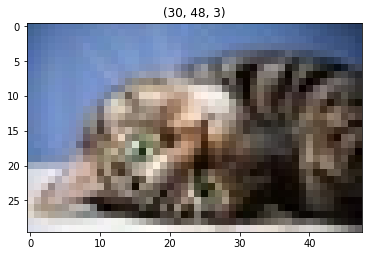

In [19]:
img = plt.imread('cat.jpg')

plt.imshow(img)
plt.title(str(img.shape))
plt.show()

img = torch.tensor(img.astype(np.float32)).permute(2, 0, 1)

# CONV2D

![conv](conv2d.png)


![param](conv_param.png)

https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html


In [20]:
class Net(nn.Module):
    def __init__(self, output_chanels, kernel_size, stride=1, padding=0, dilation=1, padding_mode='zeros'):
        super().__init__()
        self.layers = nn.Sequential(OrderedDict([
            ('conv1', nn.Conv2d(3, output_chanels, kernel_size=kernel_size, stride=stride, 
                                padding=padding, padding_mode=padding_mode, dilation=dilation)), #input size: 32*32*3
        ]))
                                    
    def forward(self, x):
        x = self.layers(x)
        return x

In [21]:
def show_filaters(net, X, title=None, params=None):
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    
    if title is None:
        plt.suptitle('Predictions', size=20)
    else:
        plt.suptitle('Predictions: ' + title, size=15)

    for i, ax in enumerate(axes.flatten()):

        prediction = net(X).permute(1, 2, 0).detach().numpy()[:, :, i]
        ax.imshow(prediction, cmap='gray')
        
        if params is not None:
            ax.set_title(params)


    plt.show()

How shape of output tesor varying after convolutional layer?


Different output channels with (3, 3) kernel
1: torch.Size([1, 28, 46]) 	 10: torch.Size([10, 28, 46]) 	 100: torch.Size([100, 28, 46])

Different kernel size with 3 output channels
(3, 3): torch.Size([3, 28, 46]) 	 (10, 10): torch.Size([3, 21, 39]) 	 (10, 5): torch.Size([3, 21, 44])


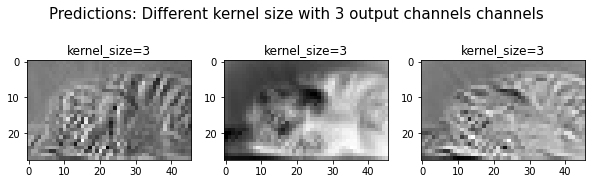

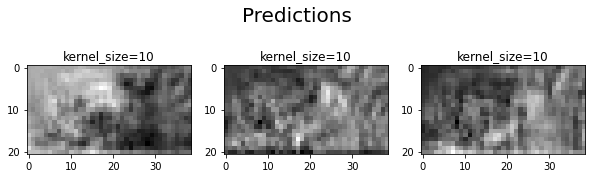

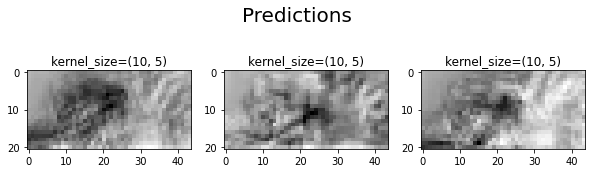


Different stride with 3 output channels and (3, 3) kernel
1: torch.Size([3, 28, 46]) 	 5: torch.Size([3, 6, 10]) 	 (10, 5): torch.Size([3, 3, 10])


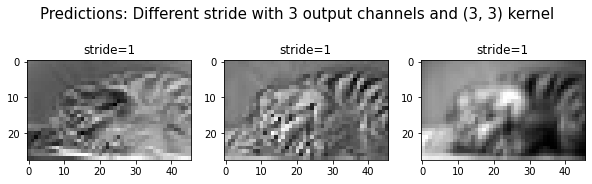

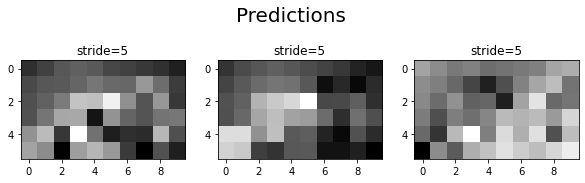

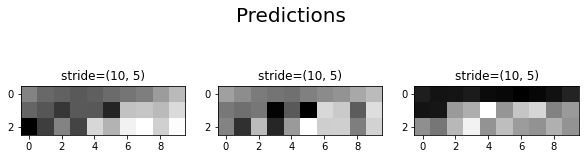

In [22]:
print('How shape of output tesor varying after convolutional layer?')
print()
print()

print('Different output channels with (3, 3) kernel')
net1 = Net(1, kernel_size=3)
net10 = Net(10, kernel_size=3)
net100 = Net(100, kernel_size=3)

print(f'1: {net1(img).shape} \t 10: {net10(img).shape} \t 100: {net100(img).shape}')
print()



print('Different kernel size with 3 output channels')
net1 = Net(3, kernel_size=3)
net2 = Net(3, kernel_size=10)
net3 = Net(3, kernel_size=(10, 5))

print(f'(3, 3): {net1(img).shape} \t (10, 10): {net2(img).shape} \t (10, 5): {net3(img).shape}')
show_filaters(net1, img, params='kernel_size=3', title='Different kernel size with 3 output channels channels')
show_filaters(net2, img, params='kernel_size=10', )
show_filaters(net3, img, params='kernel_size=(10, 5)')

print()

print('Different stride with 3 output channels and (3, 3) kernel')
net1 = Net(3, kernel_size=3, stride=1)
net2 = Net(3, kernel_size=3, stride=5)
net3 = Net(3, kernel_size=3, stride=(10, 5))

print(f'1: {net1(img).shape} \t 5: {net2(img).shape} \t (10, 5): {net3(img).shape}')
show_filaters(net1, img, params='stride=1' ,title='Different stride with 3 output channels and (3, 3) kernel')
show_filaters(net2, img, params='stride=5')
show_filaters(net3, img, params='stride=(10, 5)')

print()

Different dilation with 3 output channels and (3, 3) kernel
1: torch.Size([3, 28, 46]) 	 5: torch.Size([3, 20, 38]) 	 (10, 5): torch.Size([3, 10, 38])


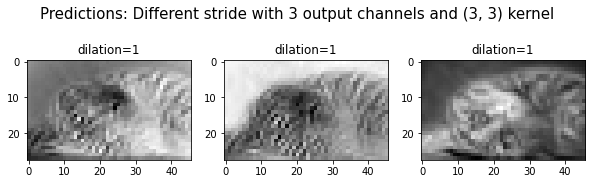

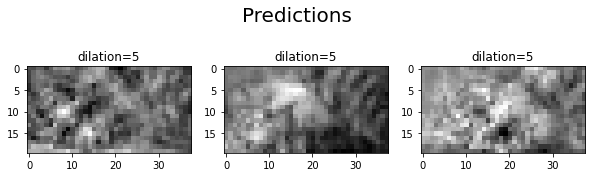

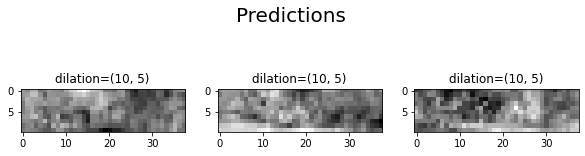

In [23]:
print('Different dilation with 3 output channels and (3, 3) kernel')
net1 = Net(3, kernel_size=3, dilation=1)
net2 = Net(3, kernel_size=3, dilation=5)
net3 = Net(3, kernel_size=3, dilation=(10, 5))

print(f'1: {net1(img).shape} \t 5: {net2(img).shape} \t (10, 5): {net3(img).shape}')
show_filaters(net1, img, params='dilation=1', title='Different stride with 3 output channels and (3, 3) kernel')
show_filaters(net2, img, params='dilation=5')
show_filaters(net3, img, params='dilation=(10, 5)')

print()

Different padding with 3 output channels and (3, 3) kernel
no padding: torch.Size([3, 28, 46]) 	 (100, 1000): torch.Size([3, 48, 66]) 	 (10, 5): torch.Size([3, 48, 56])


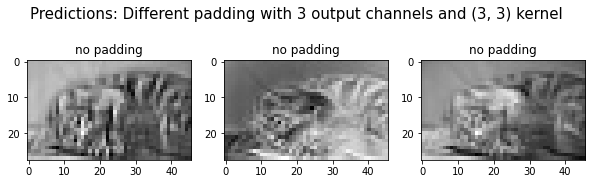

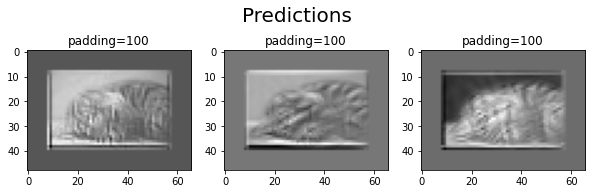

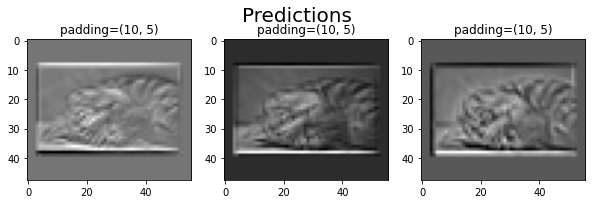


Different padding_node with 3 output channels and (3, 3) kernel
zeros: torch.Size([3, 48, 66]) 	 reflect: torch.Size([3, 48, 66]) 	 replicate: torch.Size([3, 48, 66])


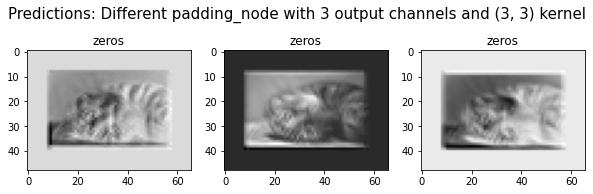

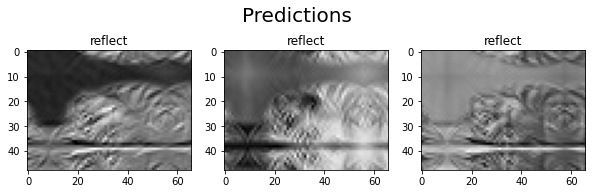

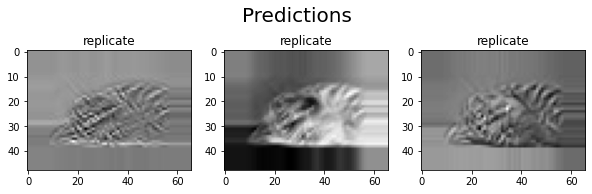

In [24]:
print('Different padding with 3 output channels and (3, 3) kernel')
net1 = Net(3, kernel_size=3, padding=0)
net2 = Net(3, kernel_size=3, padding=10)
net3 = Net(3, kernel_size=3, padding=(10, 5))

print(f'no padding: {net1(img).shape} \t (100, 1000): {net2(img).shape} \t (10, 5): {net3(img).shape}')
show_filaters(net1, img, params='no padding', title='Different padding with 3 output channels and (3, 3) kernel')
show_filaters(net2, img, params='padding=100')
show_filaters(net3, img, params='padding=(10, 5)')

print()




print('Different padding_node with 3 output channels and (3, 3) kernel')
net1 = Net(3, kernel_size=3, padding=10)
net2 = Net(3, kernel_size=3, padding=10, padding_mode='reflect')
net3 = Net(3, kernel_size=3, padding=10, padding_mode='replicate')

print(f'zeros: {net1(img).shape} \t reflect: {net2(img).shape} \t replicate: {net3(img).shape}')
show_filaters(net1, img, params='zeros', title='Different padding_node with 3 output channels and (3, 3) kernel')
show_filaters(net2, img, params='reflect')
show_filaters(net3, img, params='replicate')

print()